In [1]:
from pyspark import SparkContext
from pyspark import SQLContext
sc = SparkContext()
sqlContext = SQLContext(sc)
from pyspark.sql import SparkSession
sparkSession = SparkSession.builder.getOrCreate()

from pyspark.sql.functions import col, countDistinct
from pyspark.sql.functions import isnan, when, count, col


import matplotlib as plot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
b, g, r, p = sns.color_palette("muted", 4)

<b>Explore file #1 stores.csv</b>

In [2]:
sdfStores = sqlContext.read.csv("/gl-capstone-data/Team6-C-Sep/Data/stores.csv",header = True,inferSchema = True)

In [6]:
sdfStores.count()

54

In [8]:
sdfStores.agg(countDistinct(col("store_nbr")).alias("count")).show()
# store_nbr is the primary key as distinct count and total row count match

+-----+
|count|
+-----+
|   54|
+-----+



In [8]:
sdfStores.select([count(when(col(c).isNull(), c)).alias(c) for c in sdfStores.columns]).show()

+---------+----+-----+----+-------+
|store_nbr|city|state|type|cluster|
+---------+----+-----+----+-------+
|        0|   0|    0|   0|      0|
+---------+----+-----+----+-------+



In [8]:
sdfStores.select("city").distinct().count()

22

In [7]:
sdfStores.select("city").distinct().show(5)

+-------------+
|         city|
+-------------+
|      Quevedo|
|       Cuenca|
|     Guaranda|
|Santo Domingo|
|       Playas|
+-------------+
only showing top 5 rows



In [10]:
sdfStores.select("state").distinct().count()

16

In [11]:
sdfStores.select("state").distinct().show(5)

+----------+
|     state|
+----------+
|    Manabi|
|  Cotopaxi|
| Pichincha|
|Chimborazo|
|    Guayas|
+----------+
only showing top 5 rows



In [12]:
sdfStores.select("type").distinct().count()

5

In [14]:
sdfStores.select("type").distinct().show(10)

+----+
|type|
+----+
|   E|
|   B|
|   D|
|   C|
|   A|
+----+



In [15]:
sdfStores.select("cluster").distinct().count()

17

In [16]:
sdfStores.select("cluster").distinct().show(5)

+-------+
|cluster|
+-------+
|     12|
|      1|
|     13|
|      6|
|     16|
+-------+
only showing top 5 rows



<b>Explore file #2 oil.csv</b>

In [18]:
sdfOil = sqlContext.read.csv("/gl-capstone-data/Team6-C-Sep/Data/oil.csv",header = True,inferSchema = True)

In [15]:
sdfOil.count()

1218

In [16]:
sdfOil.agg(countDistinct(col("date")).alias("count")).show()
# date is the primary key as distinct count and total row count match

+-----+
|count|
+-----+
| 1218|
+-----+



In [17]:
sdfOil.select([count(when(col(c).isNull(), c)).alias(c) for c in sdfOil.columns]).show()

+----+----------+
|date|dcoilwtico|
+----+----------+
|   0|        43|
+----+----------+



In [18]:
sdfOil.describe().show()

+-------+------------------+
|summary|        dcoilwtico|
+-------+------------------+
|  count|              1175|
|   mean| 67.71436595744689|
| stddev|25.630475729453117|
|    min|             26.19|
|    max|            110.62|
+-------+------------------+



In [19]:
sdfOil.approxQuantile("dcoilwtico", [0.5], 0.25)
#median

[46.41]

In [23]:
row1 = sdfOil.agg({"date": "max"}).collect()[0]
print row1["max(date)"]

2017-08-31 00:00:00


In [24]:
row2 = sdfOil.agg({"date": "min"}).collect()[0]
print row2["min(date)"]

2013-01-01 00:00:00


<b>Explore file #3 holidays_events.csv</b>

In [ ]:
sdfHolidayEvents = sqlContext.read.csv("/gl-capstone-data/Team6-C-Sep/Data/holidays_events.csv",header = True,inferSchema = True)

In [20]:
sdfHolidayEvents.count()

350

In [21]:
sdfHolidayEvents.agg(countDistinct(col("date")).alias("count")).show()

+-----+
|count|
+-----+
|  312|
+-----+



In [28]:
sdfHolidayEvents.select("date").distinct().count()

312

In [24]:
sdfHolidayEvents.select("type").distinct().show()

+----------+
|      type|
+----------+
|     Event|
|   Holiday|
|  Transfer|
|    Bridge|
|Additional|
|  Work Day|
+----------+



In [25]:
sdfHolidayEvents.select("locale").distinct().show()

+--------+
|  locale|
+--------+
|National|
|   Local|
|Regional|
+--------+



In [27]:
sdfHolidayEvents.select("locale_name").distinct().count()

24

In [29]:
sdfHolidayEvents.select("date", "type", "locale_name").distinct().count()

349

In [33]:
sdfHolidayEvents.select("date", "type", "locale", "locale_name", "description", "transferred").distinct().count()
# All columns together form the PK

350

In [4]:
sdfHolidayEvents.select([count(when(col(c).isNull(), c)).alias(c) for c in sdfHolidayEvents.columns]).show()

+----+----+------+-----------+-----------+-----------+
|date|type|locale|locale_name|description|transferred|
+----+----+------+-----------+-----------+-----------+
|   0|   0|     0|          0|          0|          0|
+----+----+------+-----------+-----------+-----------+



In [5]:
sdfHolidayEvents.select("date").distinct().count()

312

In [6]:
sdfHolidayEvents.select("date").distinct().show(5)

+-------------------+
|               date|
+-------------------+
|2016-12-24 00:00:00|
|2015-09-28 00:00:00|
|2012-05-12 00:00:00|
|2013-02-12 00:00:00|
|2013-10-11 00:00:00|
+-------------------+
only showing top 5 rows



In [7]:
sdfHolidayEvents.select("type").distinct().count()

6

In [9]:
sdfHolidayEvents.select("type").distinct().show(10)

+----------+
|      type|
+----------+
|     Event|
|   Holiday|
|  Transfer|
|    Bridge|
|Additional|
|  Work Day|
+----------+



In [10]:
sdfHolidayEvents.select("locale").distinct().count()

3

In [11]:
sdfHolidayEvents.select("locale").distinct().show(5)

+--------+
|  locale|
+--------+
|National|
|   Local|
|Regional|
+--------+



In [12]:
sdfHolidayEvents.select("locale_name").distinct().count()

24

In [13]:
sdfHolidayEvents.select("locale_name").distinct().show(5)

+-------------+
|  locale_name|
+-------------+
|      Quevedo|
|       Cuenca|
|     Cotopaxi|
|     Guaranda|
|Santo Domingo|
+-------------+
only showing top 5 rows



In [14]:
sdfHolidayEvents.select("description").distinct().count()

103

In [15]:
sdfHolidayEvents.select("description").distinct().show(5)

+--------------------+
|         description|
+--------------------+
| Terremoto Manabi+11|
|Independencia de ...|
| Terremoto Manabi+25|
|Fundacion de Esme...|
|        Black Friday|
+--------------------+
only showing top 5 rows



In [16]:
sdfHolidayEvents.select("transferred").distinct().count()

2

In [ ]:
sdfHolidayEvents.select("transferred").distinct().show(5)

<b>Explore file #4 items.csv</b>

In [12]:
sdfItems = sqlContext.read.csv("/gl-capstone-data/Team6-C-Sep/Data/items.csv",header = True,inferSchema = True)

In [35]:
sdfItems.count()

4100

In [36]:
sdfItems.select("item_nbr").distinct().count()
# item_nbr is the primary key as distinct count and total row count match

4100

In [4]:
sdfItems.select([count(when(col(c).isNull(), c)).alias(c) for c in sdfItems.columns]).show()

+--------+------+-----+----------+
|item_nbr|family|class|perishable|
+--------+------+-----+----------+
|       0|     0|    0|         0|
+--------+------+-----+----------+



In [6]:
sdfItems.select("item_nbr").distinct().count()

4100

In [7]:
sdfItems.select("item_nbr").distinct().show(5)

+--------+
|item_nbr|
+--------+
|  454593|
|  459762|
|  692531|
|  699703|
|  759651|
+--------+
only showing top 5 rows



In [8]:
sdfItems.select("family").distinct().count()

33

In [10]:
sdfItems.select("family").distinct().show(10)

+-------------------+
|             family|
+-------------------+
|     PREPARED FOODS|
|HOME AND KITCHEN II|
|         LADIESWEAR|
|    LAWN AND GARDEN|
|          GROCERY I|
|          BABY CARE|
|            PRODUCE|
|         AUTOMOTIVE|
|          BEVERAGES|
|          HOME CARE|
+-------------------+
only showing top 10 rows



In [11]:
sdfItems.select("class").distinct().count()

337

In [12]:
sdfItems.select("class").distinct().show(5)

+-----+
|class|
+-----+
| 2142|
| 1088|
| 2122|
| 1084|
| 1025|
+-----+
only showing top 5 rows



In [13]:
sdfItems.approxQuantile("class", [0.5], 0.25)
#median

[1068.0]

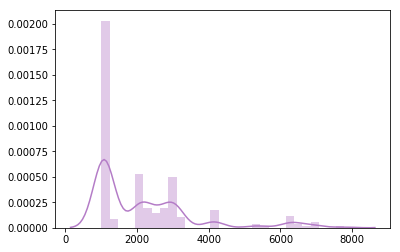

In [14]:
classes = sdfItems.select("class").collect()
sns.distplot(classes, color=p)

In [15]:
sdfItems.select("perishable").distinct().count()

2

In [16]:
sdfItems.select("perishable").distinct().show(5)

+----------+
|perishable|
+----------+
|         1|
|         0|
+----------+



<b>Explore file #5 transactions.csv</b>

In [3]:
sdfTransactions = sqlContext.read.csv("/gl-capstone-data/Team6-C-Sep/Data/transactions.csv",header = True,inferSchema = True)

In [39]:
sdfTransactions.count()

83488

In [41]:
sdfTransactions.select("date", "store_nbr").distinct().count()
# date, store_nbr together form the primary key as distinct count and total row count match

83488

In [4]:
sdfTransactions.select([count(when(col(c).isNull(), c)).alias(c) for c in sdfTransactions.columns]).show()

+----+---------+------------+
|date|store_nbr|transactions|
+----+---------+------------+
|   0|        0|           0|
+----+---------+------------+



In [5]:
sdfTransactions.select("date").distinct().count()

1682

In [6]:
sdfTransactions.select("date").distinct().show(5)

+-------------------+
|               date|
+-------------------+
|2013-10-31 00:00:00|
|2014-08-04 00:00:00|
|2015-04-26 00:00:00|
|2015-07-14 00:00:00|
|2015-10-10 00:00:00|
+-------------------+
only showing top 5 rows



In [7]:
sdfTransactions.select("store_nbr").distinct().count()

54

In [8]:
sdfTransactions.select("store_nbr").distinct().show(5)

+---------+
|store_nbr|
+---------+
|       31|
|       53|
|       34|
|       28|
|       26|
+---------+
only showing top 5 rows



In [9]:
sdfTransactions.select("transactions").distinct().count()

4993

In [10]:
sdfTransactions.select("transactions").distinct().show(5)

+------------+
|transactions|
+------------+
|        1580|
|        1238|
|        4935|
|        1591|
|        2142|
+------------+
only showing top 5 rows



In [11]:
sdfTransactions.approxQuantile("transactions", [0.5], 0.25)
#median

[1070.0]

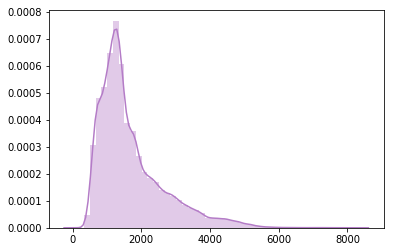

In [12]:
trans = sdfTransactions.select("transactions").collect()
sns.distplot(trans, color=p)

In [13]:
minRow = sdfTransactions.agg({"date": "min"}).collect()[0]
print minRow["min(date)"]

2013-01-01 00:00:00


In [14]:
maxRow = sdfTransactions.agg({"date": "max"}).collect()[0]
print maxRow["max(date)"]

2017-08-15 00:00:00


In [15]:
sdfTransactions.filter(sdfTransactions.store_nbr == 53).show()

+-------------------+---------+------------+
|               date|store_nbr|transactions|
+-------------------+---------+------------+
|2014-05-29 00:00:00|       53|        2545|
|2014-05-30 00:00:00|       53|        1398|
|2014-05-31 00:00:00|       53|        1812|
|2014-06-01 00:00:00|       53|        2221|
|2014-06-02 00:00:00|       53|        1085|
|2014-06-03 00:00:00|       53|         958|
|2014-06-04 00:00:00|       53|        1059|
|2014-06-05 00:00:00|       53|         888|
|2014-06-06 00:00:00|       53|         941|
|2014-06-07 00:00:00|       53|        1336|
|2014-06-08 00:00:00|       53|        1523|
|2014-06-09 00:00:00|       53|         803|
|2014-06-10 00:00:00|       53|         689|
|2014-06-11 00:00:00|       53|         800|
|2014-06-12 00:00:00|       53|         695|
|2014-06-13 00:00:00|       53|         841|
|2014-06-14 00:00:00|       53|        1376|
|2014-06-15 00:00:00|       53|        1288|
|2014-06-16 00:00:00|       53|         796|
|2014-06-1

In [17]:
sdfTransactions.filter(sdfTransactions.store_nbr == 53).count()

1167

In [18]:
sdfTransactions.filter(sdfTransactions.store_nbr == 34).count()

1678

<b>Explore  file #6 sample_submission.csv</b>

In [11]:
sdfSampleSubmission = sqlContext.read.csv("/gl-capstone-data/Team6-C-Sep/Data/sample_submission.csv",header = True,inferSchema = True)

In [43]:
sdfSampleSubmission.count()

3370464

In [44]:
sdfSampleSubmission.select("id").distinct().count()
# id is the primary key as distinct count and total row count match

3370464

In [12]:
sdfSampleSubmission.select([count(when(col(c).isNull(), c)).alias(c) for c in sdfSampleSubmission.columns]).show()

+---+----------+
| id|unit_sales|
+---+----------+
|  0|         0|
+---+----------+



In [13]:
sdfSampleSubmission.filter(sdfSampleSubmission.unit_sales ==0).count()
#All records contain zero. This column needs to be filled with prediction.

3370464

<b>Explore file #7 test.csv</b>

In [5]:
sdfTest = sqlContext.read.csv("/gl-capstone-data/Team6-C-Sep/Data/test.csv",header = True,inferSchema = True)

In [46]:
sdfTest.count()

3370464

In [47]:
sdfTest.select("id").distinct().count()

3370464

In [4]:
sdfTest.select([count(when(col(c).isNull(), c)).alias(c) for c in sdfTest.columns]).show()

+---+----+---------+--------+-----------+
| id|date|store_nbr|item_nbr|onpromotion|
+---+----+---------+--------+-----------+
|  0|   0|        0|       0|          0|
+---+----+---------+--------+-----------+



In [5]:
sdfTest.select("date", "store_nbr", "item_nbr").distinct().count()
#id is an artificial primary key. The unique set of columns are "date", "store_nbr", "item_nbr".

3370464

In [6]:
minRow = sdfTest.agg({"date": "min"}).collect()[0]
print minRow["min(date)"]

2017-08-16 00:00:00


In [8]:
maxRow = sdfTest.agg({"date": "max"}).collect()[0]
print maxRow["max(date)"]

2017-08-31 00:00:00


In [9]:
sdfTest.select("onpromotion").distinct().count()

2

In [10]:
sdfTest.select("onpromotion").distinct().show(5)

+-----------+
|onpromotion|
+-----------+
|       true|
|      false|
+-----------+



<b>Explore file #8 train.csv </b>

In [3]:
sdfTrain = sqlContext.read.csv("/gl-capstone-data/Team6-C-Sep/Data/train/train.csv",header = True,inferSchema = True)

In [4]:
sdfTrain.count()

125497040

In [5]:
sdfTrain.select("id").distinct().count()
# id is the primary key as distinct count and total row count match

125497040

In [6]:
sdfTrain.select([count(when(col(c).isNull(), c)).alias(c) for c in sdfTrain.columns]).show()

+---+----+---------+--------+----------+-----------+
| id|date|store_nbr|item_nbr|unit_sales|onpromotion|
+---+----+---------+--------+----------+-----------+
|  0|   0|        0|       0|         0|   21657651|
+---+----+---------+--------+----------+-----------+



In [7]:
sdfTrain.approxQuantile("unit_sales", [0.5], 0.25)
#median

[6.0]

In [8]:
minRowTrain = sdfTrain.agg({"date": "min"}).collect()[0]
print minRowTrain["min(date)"]

2013-01-01 00:00:00


In [9]:
maxRowTrain = sdfTrain.agg({"date": "max"}).collect()[0]
print maxRowTrain["max(date)"]

2017-08-15 00:00:00


In [7]:
sdfTrain.select("onpromotion").distinct().count()

3

In [8]:
sdfTrain.select("onpromotion").distinct().show(10)

+-----------+
|onpromotion|
+-----------+
|       null|
|       true|
|      false|
+-----------+



In [ ]:
unit_sales = sdfTrain.select("unit_sales").collect()
sns.distplot(unit_sales, color=p)

<b>Check relatioship between test and sample_submission </b>

In [51]:
print(sdfTest.show(10))

+---------+-------------------+---------+--------+-----------+
|       id|               date|store_nbr|item_nbr|onpromotion|
+---------+-------------------+---------+--------+-----------+
|125497040|2017-08-16 00:00:00|        1|   96995|      false|
|125497041|2017-08-16 00:00:00|        1|   99197|      false|
|125497042|2017-08-16 00:00:00|        1|  103501|      false|
|125497043|2017-08-16 00:00:00|        1|  103520|      false|
|125497044|2017-08-16 00:00:00|        1|  103665|      false|
|125497045|2017-08-16 00:00:00|        1|  105574|      false|
|125497046|2017-08-16 00:00:00|        1|  105575|      false|
|125497047|2017-08-16 00:00:00|        1|  105576|      false|
|125497048|2017-08-16 00:00:00|        1|  105577|      false|
|125497049|2017-08-16 00:00:00|        1|  105693|      false|
+---------+-------------------+---------+--------+-----------+
only showing top 10 rows

None


In [14]:
sdfSampleSubmission.createOrReplaceTempView("vwSampleSubmission")

In [55]:
sparkSession.sql('select * from vwSampleSubmission where id in (125497040, 125497041, 125497042, 125497043, 125497044, 125497045, 125497046, 125497047, 125497048, 125497049)').show()

+---------+----------+
|       id|unit_sales|
+---------+----------+
|125497040|         0|
|125497041|         0|
|125497042|         0|
|125497043|         0|
|125497044|         0|
|125497045|         0|
|125497046|         0|
|125497047|         0|
|125497048|         0|
|125497049|         0|
+---------+----------+



In [6]:
sdfTest.createOrReplaceTempView("vwTest")

In [16]:
sparkSession.sql('select count(*) from vwSampleSubmission, vwTest where vwSampleSubmission.id = vwTest.id').show()

+--------+
|count(1)|
+--------+
| 3370464|
+--------+



<b>Check relatioship between test and stores, items </b>

In [7]:
sdfStores.createOrReplaceTempView("vwStores")

In [8]:
sdfItems.createOrReplaceTempView("vwItems")

In [9]:
sparkSession.sql('select count(distinct vwTest.item_nbr)  from vwItems, vwTest where vwItems.item_nbr = vwTest.item_nbr').show()

+------------------------+
|count(DISTINCT item_nbr)|
+------------------------+
|                    3901|
+------------------------+



In [10]:
sparkSession.sql('select count(distinct vwTest.store_nbr)  from vwStores, vwTest where vwStores.store_nbr = vwTest.store_nbr').show()

+-------------------------+
|count(DISTINCT store_nbr)|
+-------------------------+
|                       54|
+-------------------------+



<b>Check relatioship between train and stores, items </b>

In [4]:
sdfStores.createOrReplaceTempView("vwStores")

In [15]:
sdfItems.createOrReplaceTempView("vwItems")

In [5]:
sdfTrain.createOrReplaceTempView("vwTrain")

In [16]:
sparkSession.sql('select count(distinct vwTrain.item_nbr)  from vwItems, vwTrain where vwItems.item_nbr = vwTrain.item_nbr').show()

+------------------------+
|count(DISTINCT item_nbr)|
+------------------------+
|                    4036|
+------------------------+



In [6]:
sparkSession.sql('select count(distinct vwTrain.store_nbr)  from vwStores, vwTrain where vwStores.store_nbr = vwTrain.store_nbr').show()

+-------------------------+
|count(DISTINCT store_nbr)|
+-------------------------+
|                       54|
+-------------------------+

